In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Organizing data

In [232]:
hours = list(range(24))

In [2]:
#changong data types to datetime format for users table

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)
users = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [200]:
#changing data types to datetime format for users table

charging_to_clean = pd.read_csv('./data/charging.csv')
charging_to_clean['ConnectionTime'] = pd.to_datetime(charging_to_clean.connectionTime, infer_datetime_format=True) 
charging_to_clean['DisconnectTime'] = pd.to_datetime(charging_to_clean.disconnectTime, infer_datetime_format=True) 
charging_to_clean['DoneCharging'] = pd.to_datetime(charging_to_clean.doneChargingTime, infer_datetime_format=True) 

charging = charging_to_clean.drop(columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'Unnamed: 0'])
charging.head()

,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
0,5bc90cb9f9af8b0d7fe77cd2,39,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00
1,5bc90cb9f9af8b0d7fe77cd3,39,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00
2,5bc90cb9f9af8b0d7fe77cd4,39,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00
3,5bc90cb9f9af8b0d7fe77cd5,39,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00
4,5bc90cb9f9af8b0d7fe77cd6,39,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00


In [201]:
charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,28042.0,28042.000000,28042.0,13275.000000
mean,39.0,8.898859,2.0,1093.202109
std,0.0,8.088413,0.0,871.109487
min,39.0,0.501000,2.0,1.000000
25%,39.0,3.422000,2.0,567.000000
50%,39.0,6.695000,2.0,869.000000
75%,39.0,12.675000,2.0,1222.000000
max,39.0,75.528000,2.0,6952.000000


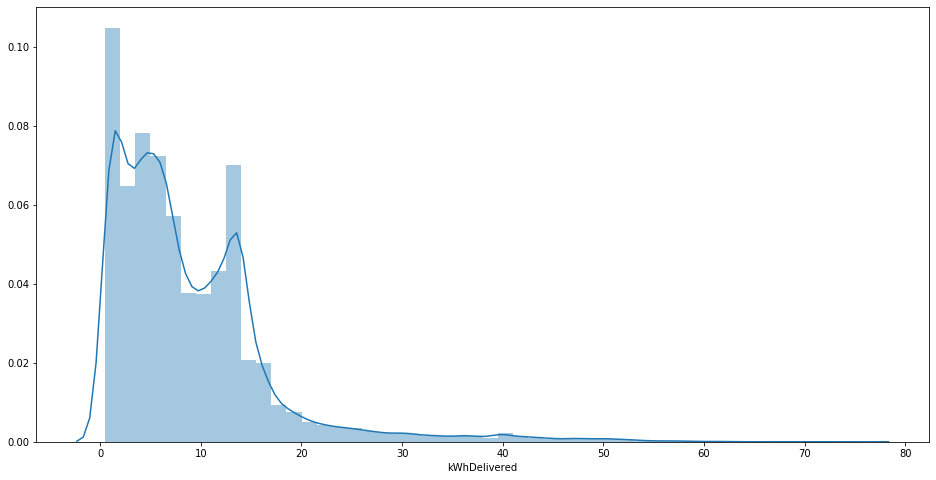

In [42]:
ax, fig = plt.subplots(figsize = (16,8))
ax = sns.distplot(charging.kWhDelivered)

## Time to charge

In [110]:
time_to_charge = charging.DoneCharging - charging.ConnectionTime
time = []
for index, value in time_to_charge.items():
    time.append(value.seconds)

time = [x / 60 for x in time]

Text(0.5, 0, 'Time to charge, in minutes')

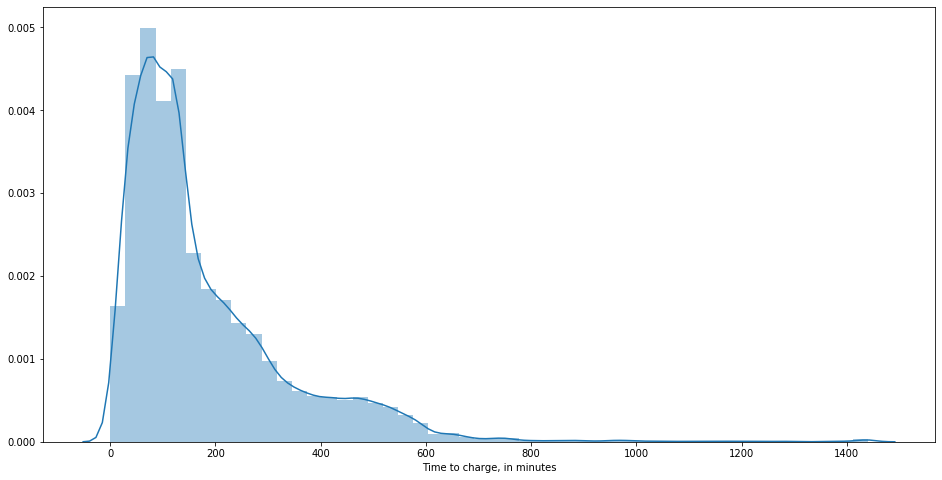

In [107]:
ax, fig = plt.subplots(figsize = (16,8))
ax = sns.distplot(time)
ax.set_xlabel('Time to charge, in minutes')

In [ ]:
time_to_charge = charging.DoneCharging - charging.ConnectionTime
time = []
for index, value in time_to_charge.items():
    time.append(value.seconds)


In [215]:
charging['ChargeTime'] = charging.DoneCharging - charging.ConnectionTime
time1 = []
for index, value in charging.ChargeTime.items():
    time1.append(value.seconds)

time1 = [x / 60 for x in time]
charging['Time'] = time1


Text(0.5, 1.0, 'Average length of charging session by the hour of car arrival')

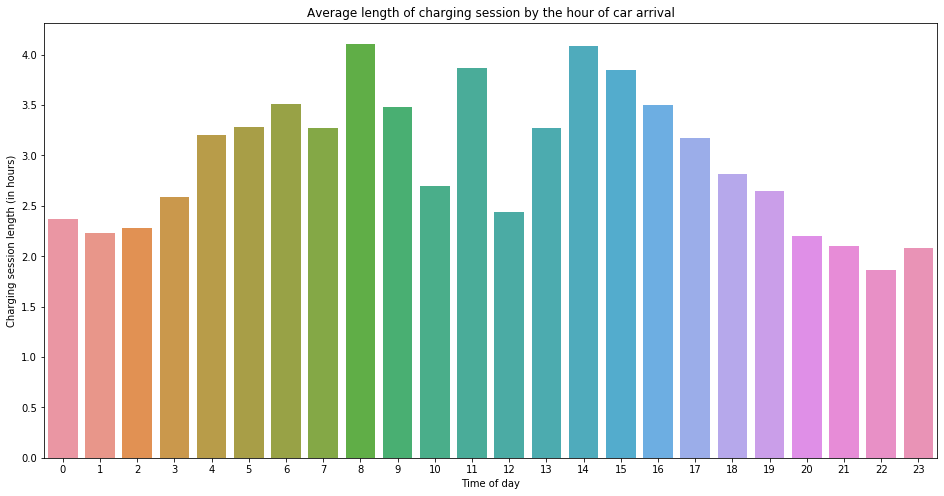

In [235]:
#plotting average length of charging session by the hour of car arrival (start of charging session)

charging_by_hour = charging.groupby(charging.ConnectionTime.dt.hour).mean()

fig, ax = plt.subplots(figsize = (16, 8))
y = charging_by_hour.Time
x = hours
ax = sns.barplot(x, y)
ax.set_xlabel('Time of day')
ax.set_ylabel('Charging session length (in hours)')
ax.set_title('Average length of charging session by the hour of car arrival')

In [282]:
# filtering days sessions by day and night

daymask = ((charging.ConnectionTime.dt.hour > 8) & (charging.ConnectionTime.dt.hour < 22))
day_charging = charging[daymask]
day_mean = day_charging.Time.mean()
day_std = day_charging.Time.std()
day_mean, day_std

(3.2456242137033957, 2.6265404988333776)

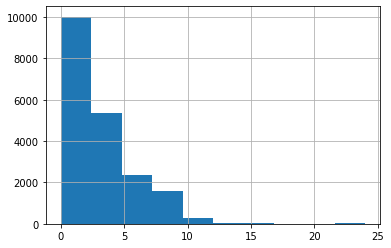

In [263]:
day_charging.Time.hist()

In [280]:
nightmask = ((charging.ConnectionTime.dt.hour < 8) | (charging.ConnectionTime.dt.hour > 22))
night_charging = charging[nightmask]
night_charging
night_mean = night_charging.Time.mean()
night_std = night_charging.Time.std()
night_mean, night_std

(2.4783384130854516, 2.80103925519423)

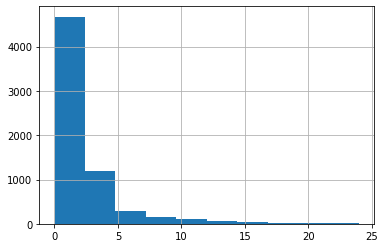

In [264]:
night_charging.Time.hist()

In [279]:
day = list(day_charging.Time)
night = list(night_charging.Time)


In [278]:
stats.ttest_ind(day, night, equal_var=False, nan_policy = 'omit')

Ttest_indResult(statistic=19.514765576966102, pvalue=2.31813501605428e-83)